In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from keras import optimizers

%matplotlib inline
from tensorflow.keras.layers import BatchNormalization


In [3]:
DATASET1="C:\\Users\\Mohini Tyagi\\Downloads\\POTATO LEAF PROJECT\\Data\\Train"
DATASET2="C:\\Users\\Mohini Tyagi\\Downloads\\POTATO LEAF PROJECT\\Data\\Test"

In [4]:
CATEGORIES=["Potato_Curly_leaf","Potato_Early_Blight","Potato_healthy","Potato_Late_blight"]

In [6]:
train_data=[]
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET1,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            train_data.append([img,label])
            

In [7]:
test_data=[]
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            test_data.append([img,label])

In [8]:
print(len(train_data))

5456


In [9]:
print(len(test_data))

1366


In [10]:
# suffling to keep the data at random position to avoid underfitting and overfitting

import random

random.shuffle(train_data)
random.shuffle(test_data)
for lbl in train_data[:4]:
    print(lbl[1])
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)
    

2
0
0
1


In [11]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("Potato Curly Leaf")
 
    elif i==1:
        Y.append("Potato Early Blight")
    elif i==2:
        Y.append("Potato Healthy")
    else :
        Y.append("Potato Late Blight")


In [12]:
import pandas as pd
df1=pd.DataFrame(Y,columns=['Diseases'])
df1

,Diseases
0,Potato Healthy
1,Potato Curly Leaf
2,Potato Curly Leaf
3,Potato Early Blight
4,Potato Late Blight
...,...
5451,Potato Healthy
5452,Potato Curly Leaf
5453,Potato Healthy
5454,Potato Healthy


In [13]:
len(X_train),len(y_train)


(5456, 5456)

In [14]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

In [15]:
Z=[]
for i in y_test:
    if i==0:
        Z.append("Potato Curly leaf")
 
    elif i==1:
        Z.append("Potato Early Blight")
    elif i==2:
        Z.append("Potato Healthy")
    else :
        Z.append("Potato Late Blight")


In [16]:
df2=pd.DataFrame(Z,columns=['Diseases'])
df2

,Diseases
0,Potato Late Blight
1,Potato Late Blight
2,Potato Curly leaf
3,Potato Healthy
4,Potato Curly leaf
...,...
1361,Potato Curly leaf
1362,Potato Late Blight
1363,Potato Curly leaf
1364,Potato Curly leaf


In [17]:
len(X_test),len(y_test)


(1366, 1366)

In [18]:
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape


(1366, 64, 64, 3)

In [19]:
order=["Potato Curly leaf","Potato Early Blight","Potato Healthy","Potato Late Blight"]

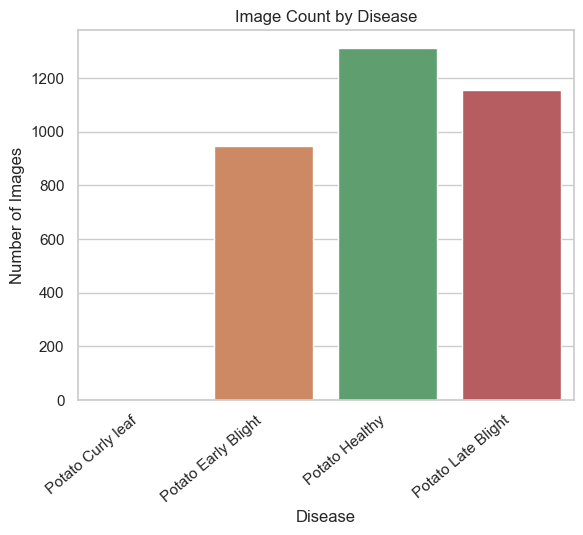

<Figure size 400x200 with 0 Axes>

In [23]:
# sns.countplot(x="Diseases", data=df1,order=order)
# plt.title("Image Count by Disease")
# plt.xlabel("Disease")
# plt.ylabel("Number of Images")
# plt.xticks(rotation=45,ha='right')
# plt.savefig('tran1.eps',format='eps')
# plt.show()
# plt.savefig('tran1.eps',format='eps')
# sns.countplot(x="Diseases", data=df1,order=order)
# plt.title("Image Count by Disease")
# plt.xlabel("Disease")
# plt.ylabel("Number of Images")
# plt.xticks(rotation=40,ha='right')
# plt.savefig('tran1.eps',format='eps')
# plt.show()

sns.set(style="whitegrid")
sns.countplot(x="Diseases", data=df1, order=order)

plt.title("Image Count by Disease")
plt.xlabel("Disease")
plt.ylabel("Number of Images")
plt.xticks(rotation=40, ha='right')

# Adjust figure size to reduce width
plt.figure(figsize=(4, 2))

plt.savefig('tran1.eps', format='eps')
plt.show()


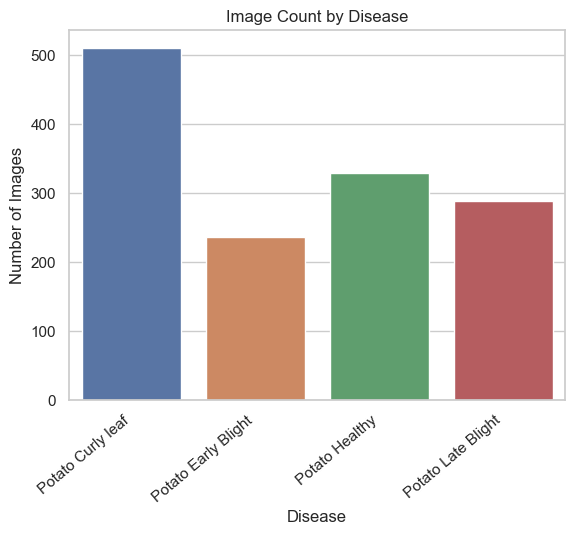

<Figure size 400x200 with 0 Axes>

In [24]:
# sns.countplot(x="Diseases", data=df2,order=order)
# plt.savefig('tran2.eps',format='eps')
# plt.title("Image Count by Disease")
# plt.xlabel("Disease")
# plt.ylabel("Number of Images")
# plt.xticks(rotation=40,ha='right')
# plt.show()

sns.set(style="whitegrid")
sns.countplot(x="Diseases", data=df2, order=order)

plt.title("Image Count by Disease")
plt.xlabel("Disease")
plt.ylabel("Number of Images")
plt.xticks(rotation=40, ha='right')

# Adjust figure size to reduce width
plt.figure(figsize=(4, 2))

plt.savefig('tran2.eps', format='eps')
plt.show()


In [20]:
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout

one_hot_train=to_categorical(y_train)
# one_hot_train

one_hot_test=to_categorical(y_test)
# one_hot_test

classifier=Sequential()

classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=4))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [ ]:
hist=classifier.fit(X_train,one_hot_train,epochs=25,batch_size=128,validation_split=0.2)

Epoch 1/25
35/35 [==============================] - 17s 460ms/step - loss: 1.1563 - accuracy: 0.4384 - val_loss: 0.8591 - val_accuracy: 0.5989
Epoch 2/25
35/35 [==============================] - 15s 442ms/step - loss: 0.7052 - accuracy: 0.6854 - val_loss: 0.5755 - val_accuracy: 0.7967
Epoch 3/25
35/35 [==============================] - 16s 446ms/step - loss: 0.5036 - accuracy: 0.7945 - val_loss: 0.5017 - val_accuracy: 0.7683
Epoch 4/25
35/35 [==============================] - 16s 447ms/step - loss: 0.4354 - accuracy: 0.8343 - val_loss: 0.3893 - val_accuracy: 0.8672
Epoch 5/25
35/35 [==============================] - 15s 436ms/step - loss: 0.3554 - accuracy: 0.8669 - val_loss: 0.3609 - val_accuracy: 0.8800
Epoch 6/25
35/35 [==============================] - 15s 437ms/step - loss: 0.2975 - accuracy: 0.8918 - val_loss: 0.2768 - val_accuracy: 0.9103
Epoch 7/25
35/35 [==============================] - 15s 438ms/step - loss: 0.2600 - accuracy: 0.9090 - val_loss: 0.2231 - val_accuracy: 0.9258

In [ ]:
train_loss,train_acc=classifier.evaluate(X_train,one_hot_train)
train_loss,train_acc

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.savefig('tran3.eps',format='eps')
plt.show()


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.savefig('tran4.eps',format='eps')
plt.show()

# y_pred=classifier.predict_classes(X_test)
y_pred=np.argmax(classifier.predict(X_test), axis=-1)

# y_pred

# y_prob=classifier.predict_proba(X_test)
y_prob=classifier.predict(X_test)
# y_prob
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
thresh ={}
roc_auc={}
n_class = 4
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
     
plt.plot(fpr[0], tpr[0], color='orange',label='Potato Curly Leaf AUC = %0.3f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green',label='Potato Early BlightAUC = %0.3f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue',label='Potato Healthy AUC = %0.3f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='red',label='Potato Late Blight AUC = %0.3f' % roc_auc[3])

plt.savefig('tran5.eps',format='eps') 

plt.title('Potato Leaves Diseases ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [ ]:
cm=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(7,5))

sns.heatmap(cm, annot=True,fmt='d', cmap='Blues', xticklabels=order, yticklabels=order,linewidths=1,linecolor='black')
plt.savefig('tran6.eps',format='eps')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
classifier.save("CNN.h5")


In [ ]:
from numpy import loadtxt
from keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def load_image(filename):
    img = load_img(filename, target_size=(64, 64))
    img = img_to_array(img)
    img = img.reshape(1, 64, 64, 3)
    img = img.astype('float32')
    img = img / 255.0
    return img
test_image = load_image("C:\\Users\\Mohini Tyagi\\Downloads\\POTATO LEAF PROJECT\\data\\Train\\Potato_Curly_leaf\\curly_leaf_(27).JPG")
img = mpimg.imread("C:\\Users\\Mohini Tyagi\\Downloads\\POTATO LEAF PROJECT\\data\\Train\\Potato_Curly_leaf\\curly_leaf_(27).JPG")

plt.imshow(img)
# load model
classifier = tf.keras.models.load_model('./CNN.h5')
classes = classifier.predict(test_image)[0]
order=["Potato Curly Leaf","Potato Early Blight","Potato Healthy","Potato Leaf Blight"]
for i in range(len(order)):
    print(order[i]+"---->%2.5f" % (classes[i]*100))
    
plt.savefig('tran7.eps',format='eps')